Unique classes in the target variable: [0 1]


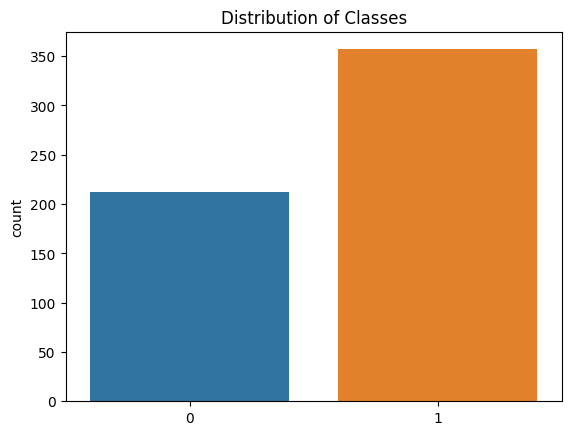

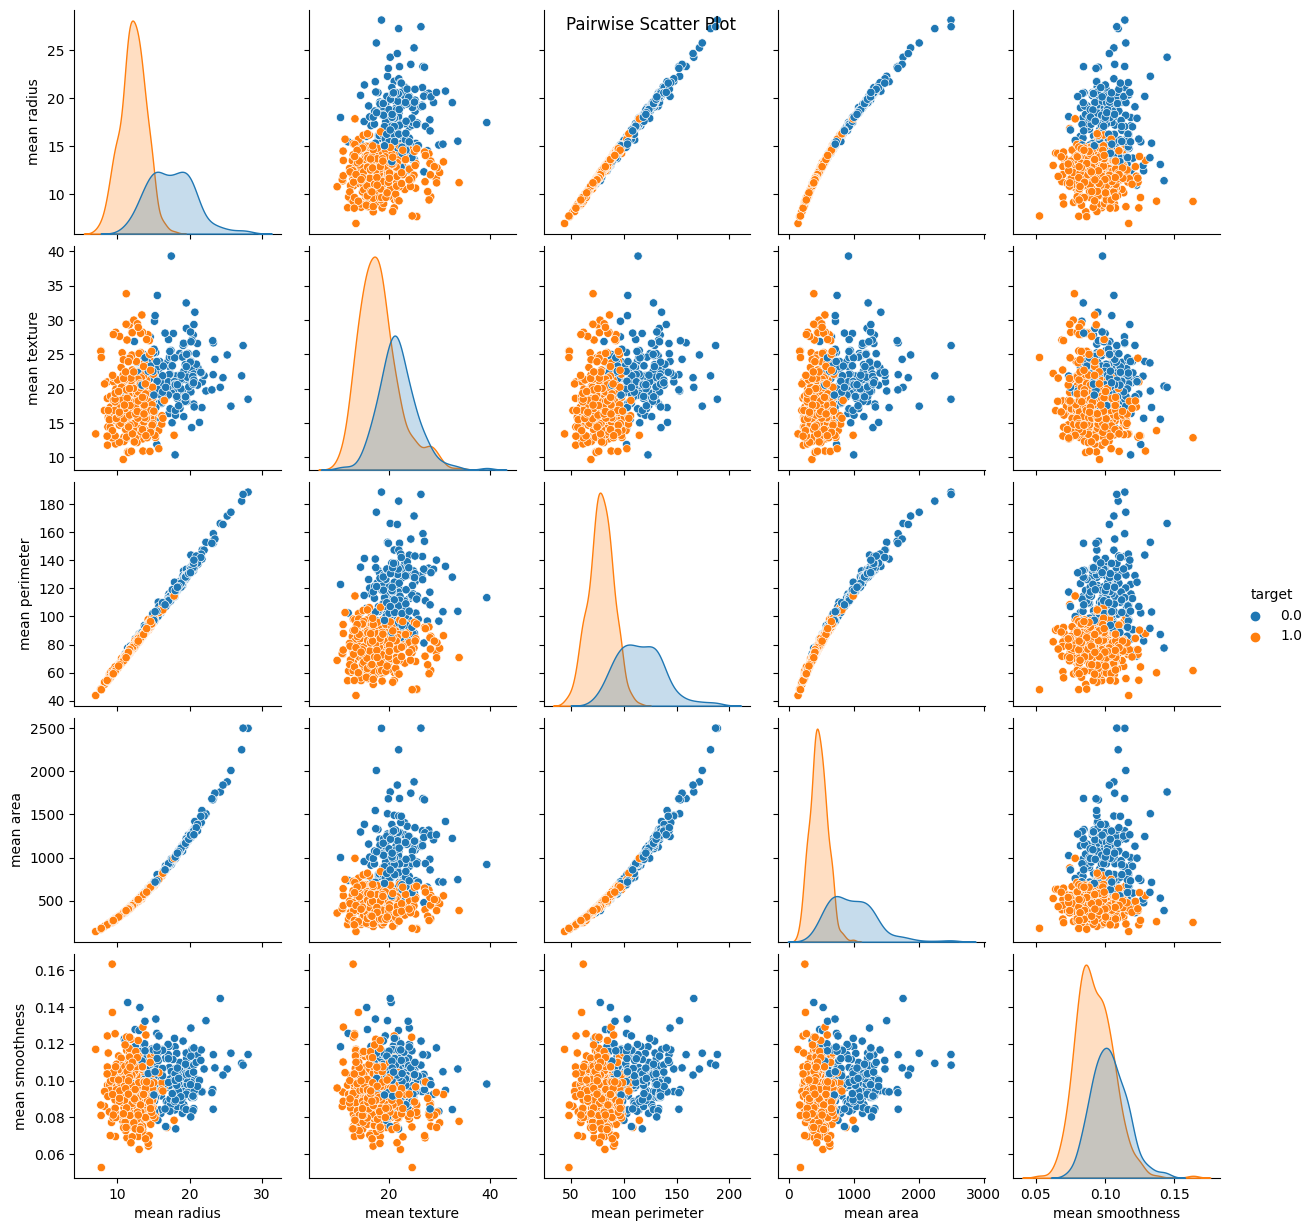

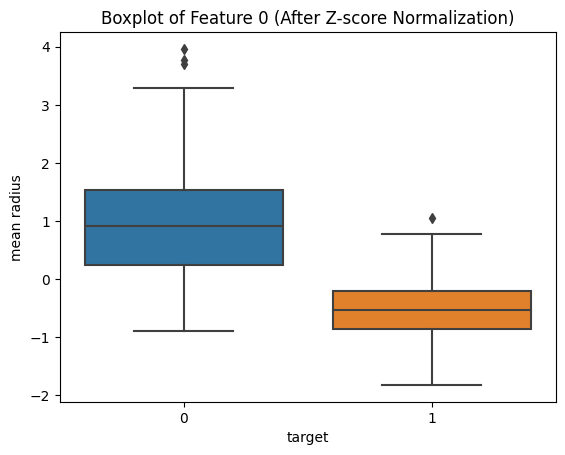


Unique classes in the training set: [0 1]
Unique classes in the testing set: [0 1]
K-Nearest Neighbors Accuracy (Z-score Normalization): 0.9474
Decision Tree Accuracy (Z-score Normalization): 0.9298
SVM Accuracy (Z-score Normalization): 0.9825


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Check unique classes in the target variable
print("Unique classes in the target variable:", np.unique(y))

# Visualize the distribution of classes
sns.countplot(x=y)
plt.title("Distribution of Classes")
plt.show()

# Explore the dataset (pairwise scatter plot)
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
sns.pairplot(df_cancer, hue='target', vars=cancer['feature_names'][:5])  # Visualize the first five features
plt.suptitle("Pairwise Scatter Plot")
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Z-score normalization
z_score_scaler = StandardScaler()
X_train_zscore = z_score_scaler.fit_transform(X_train)
X_test_zscore = z_score_scaler.transform(X_test)

# Visualize the distribution of features after Z-score normalization
df_zscored = pd.DataFrame(X_train_zscore, columns=cancer.feature_names)
df_zscored['target'] = y_train
sns.boxplot(data=df_zscored, x='target', y=cancer.feature_names[0])
plt.title("Boxplot of Feature 0 (After Z-score Normalization)")
plt.show()

# Check unique classes in the training and testing sets
print("\nUnique classes in the training set:", np.unique(y_train))
print("Unique classes in the testing set:", np.unique(y_test))

# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_zscore, y_train)
knn_predictions = knn_classifier.predict(X_test_zscore)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"K-Nearest Neighbors Accuracy (Z-score Normalization): {knn_accuracy:.4f}")

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_zscore, y_train)
dt_predictions = dt_classifier.predict(X_test_zscore)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy (Z-score Normalization): {dt_accuracy:.4f}")

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_zscore, y_train)
svm_predictions = svm_classifier.predict(X_test_zscore)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy (Z-score Normalization): {svm_accuracy:.4f}")
